# Credit Card Fraud Detection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Load Dataset

In [5]:
df = pd.read_csv(r"D:\documents\Data Analysis With Python\Machine Learning\ML_Project\archive (4)\creditcard.csv")  # Path to your dataset
print("Shape:", df.shape)
df.head()

Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   V1             284807 non-null  float64
 1   V2             284807 non-null  float64
 2   V3             284807 non-null  float64
 3   V4             284807 non-null  float64
 4   V5             284807 non-null  float64
 5   V6             284807 non-null  float64
 6   V7             284807 non-null  float64
 7   V8             284807 non-null  float64
 8   V9             284807 non-null  float64
 9   V10            284807 non-null  float64
 10  V11            284807 non-null  float64
 11  V12            284807 non-null  float64
 12  V13            284807 non-null  float64
 13  V14            284807 non-null  float64
 14  V15            284807 non-null  float64
 15  V16            284807 non-null  float64
 16  V17            284807 non-null  float64
 17  V18    

In [21]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  2.239053e-15   
std    1.332271e+00  1.237094

In [22]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum(), "missing values found.")



Missing Values:
0 missing values found.


# Class Distribution

C:\Users\AIMS TECH\AppData\Local\Temp\ipykernel_7788\207458062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


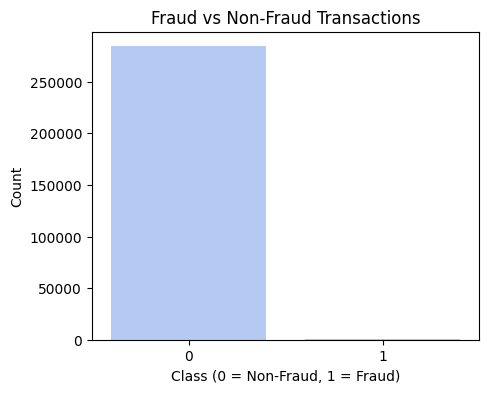

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [10]:
fraud_cases = df[df['Class'] == 1]
non_fraud_cases = df[df['Class'] == 0]
print(f"Number of Fraud Cases: {len(fraud_cases)}")
print(f"Number of Non-Fraud Cases: {len(non_fraud_cases)}")

Number of Fraud Cases: 492
Number of Non-Fraud Cases: 284315


# Correlation Heatmap

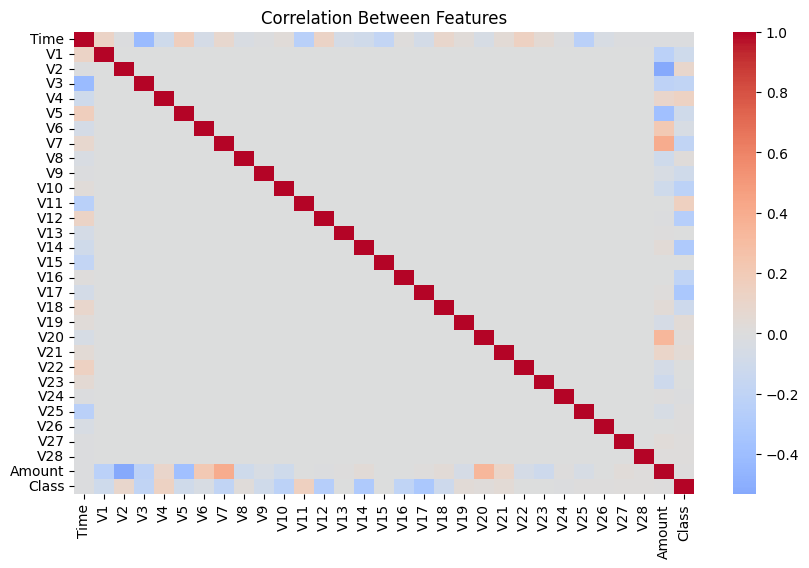

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Between Features")
plt.show()

# Feature Distribution

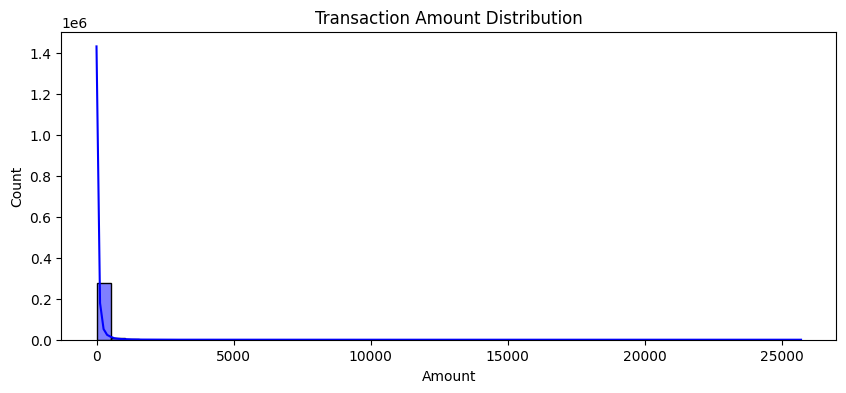

In [12]:
plt.figure(figsize=(10,4))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.show()

# Feature Scaling

In [13]:
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])
df = df.drop(['Amount', 'Time'], axis=1)

# Split Data into Train and Test

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")


Training Data Shape: (227845, 30)
Test Data Shape: (56962, 30)


# Handle Class Imbalance using SMOTE

In [15]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("\nClass distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(y_res.value_counts())



Class distribution before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64

Class distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


# Model Training

In [16]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_res, y_res)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_res, y_res)

print("\nModels Trained Successfully!")


Models Trained Successfully!


# Model Evaluation


-----------------------------
->Logistic Regression Evaluation Results
-----------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC Score: 0.9698


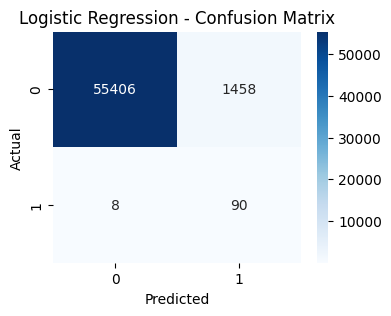


-----------------------------
->Random Forest Evaluation Results
-----------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9688


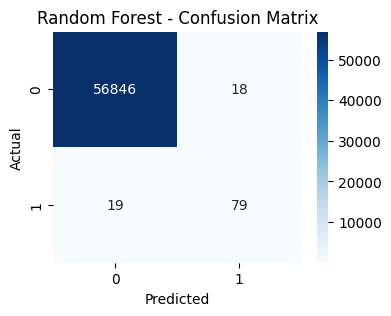

In [18]:
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model
}

for name, model in models.items():
    print(f"\n-----------------------------")
    print(f"->{name} Evaluation Results")
    print(f"-----------------------------")
    
    y_pred = model.predict(X_test)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(f"ROC-AUC Score: {auc:.4f}")
    
    # Confusion Matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ROC Curve

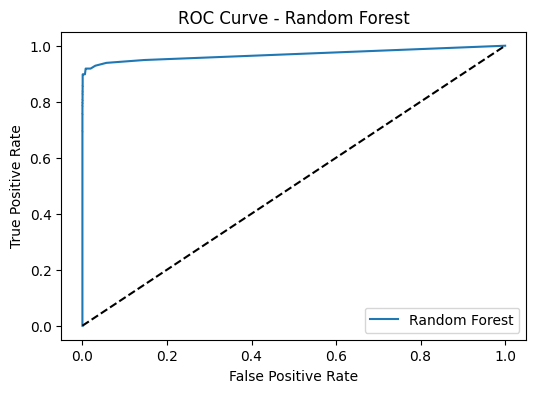

In [19]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()